Group Members:
*   Aquino, Kerwin Dominique
*   Lagazo, John Louise
*   Manlapig, Ralph Miguel
*   Tadeo, Lorenz Christian

Data taken from: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

# Install and Import Libraries

In [ ]:
!pip install sklearn pandas numpy matplotlib
!pip install pydotplus graphviz
!pip install pgmpy
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from sklearn.naive_bayes import GaussianNB
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from sklearn.preprocessing import KBinsDiscretizer
import networkx as nx
import matplotlib.pyplot as plt

# Import Cleaned Data

In [ ]:
hf_data = pd.read_csv('/content/heart_failure_clinical_records_dataset _cleaned.csv')
hf_data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
hf_data.tail(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
# Double Check if data is clean
hf_data.duplicated().sum()

0

In [ ]:
hf_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Data Discretization and Binning

In [ ]:
hf_data2 = hf_data
le = LabelEncoder()
hf_data2['age'] = le.fit_transform(hf_data2['age'].astype('str'))
hf_data2['time'] = le.fit_transform(hf_data2['time'].astype('str'))
hf_data2['ejection_fraction'] = le.fit_transform(hf_data2['ejection_fraction'].astype('str'))
hf_data2['platelets'] = le.fit_transform(hf_data2['platelets'].astype('str'))
hf_data2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,34,0,582,0,3,1,86,1.9,130,1,0,104,1
1,15,0,7861,0,7,0,84,1.1,136,1,0,115,1
2,26,0,146,0,3,0,18,1.3,129,1,1,124,1
3,10,1,111,0,3,0,41,1.9,137,1,0,124,1
4,26,1,160,1,3,0,126,2.7,116,0,0,134,1


In [ ]:
kmd= KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'kmeans')
hf_data2[['age_kmd']] = kmd.fit_transform(np.array(hf_data2[['age']]))

In [ ]:
kmd= KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'kmeans')
hf_data2[['time_kmd']] = kmd.fit_transform(np.array(hf_data2[['time']]))

In [ ]:
kmd= KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'kmeans')
hf_data2[['ej_kmd']] = kmd.fit_transform(np.array(hf_data2[['ejection_fraction']]))

In [ ]:
kmd= KBinsDiscretizer(n_bins = 4, encode = 'ordinal', strategy = 'kmeans')
hf_data2[['platelets_kmd']] = kmd.fit_transform(np.array(hf_data2[['platelets']]))

In [ ]:
hf_data2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_kmd,time_kmd,ej_kmd,platelets_kmd
0,34,0,582,0,3,1,86,1.9,130,1,0,104,1,2.0,2.0,0.0,1.0
1,15,0,7861,0,7,0,84,1.1,136,1,0,115,1,0.0,2.0,1.0,1.0
2,26,0,146,0,3,0,18,1.3,129,1,1,124,1,1.0,2.0,0.0,0.0
3,10,1,111,0,3,0,41,1.9,137,1,0,124,1,0.0,2.0,0.0,0.0
4,26,1,160,1,3,0,126,2.7,116,0,0,134,1,1.0,2.0,0.0,2.0


# Decision Tree Classification

## DT without Discretization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hf_data2.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]], hf_data2.iloc[:, 12], test_size = 0.3, random_state = 50)

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
# y_pred

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred)
cm_dt

array([[43, 17],
       [ 9, 21]])

In [ ]:
accuracy_dt = (accuracy_score(y_test, y_pred)) * 100
accuracy_dt

71.11111111111111

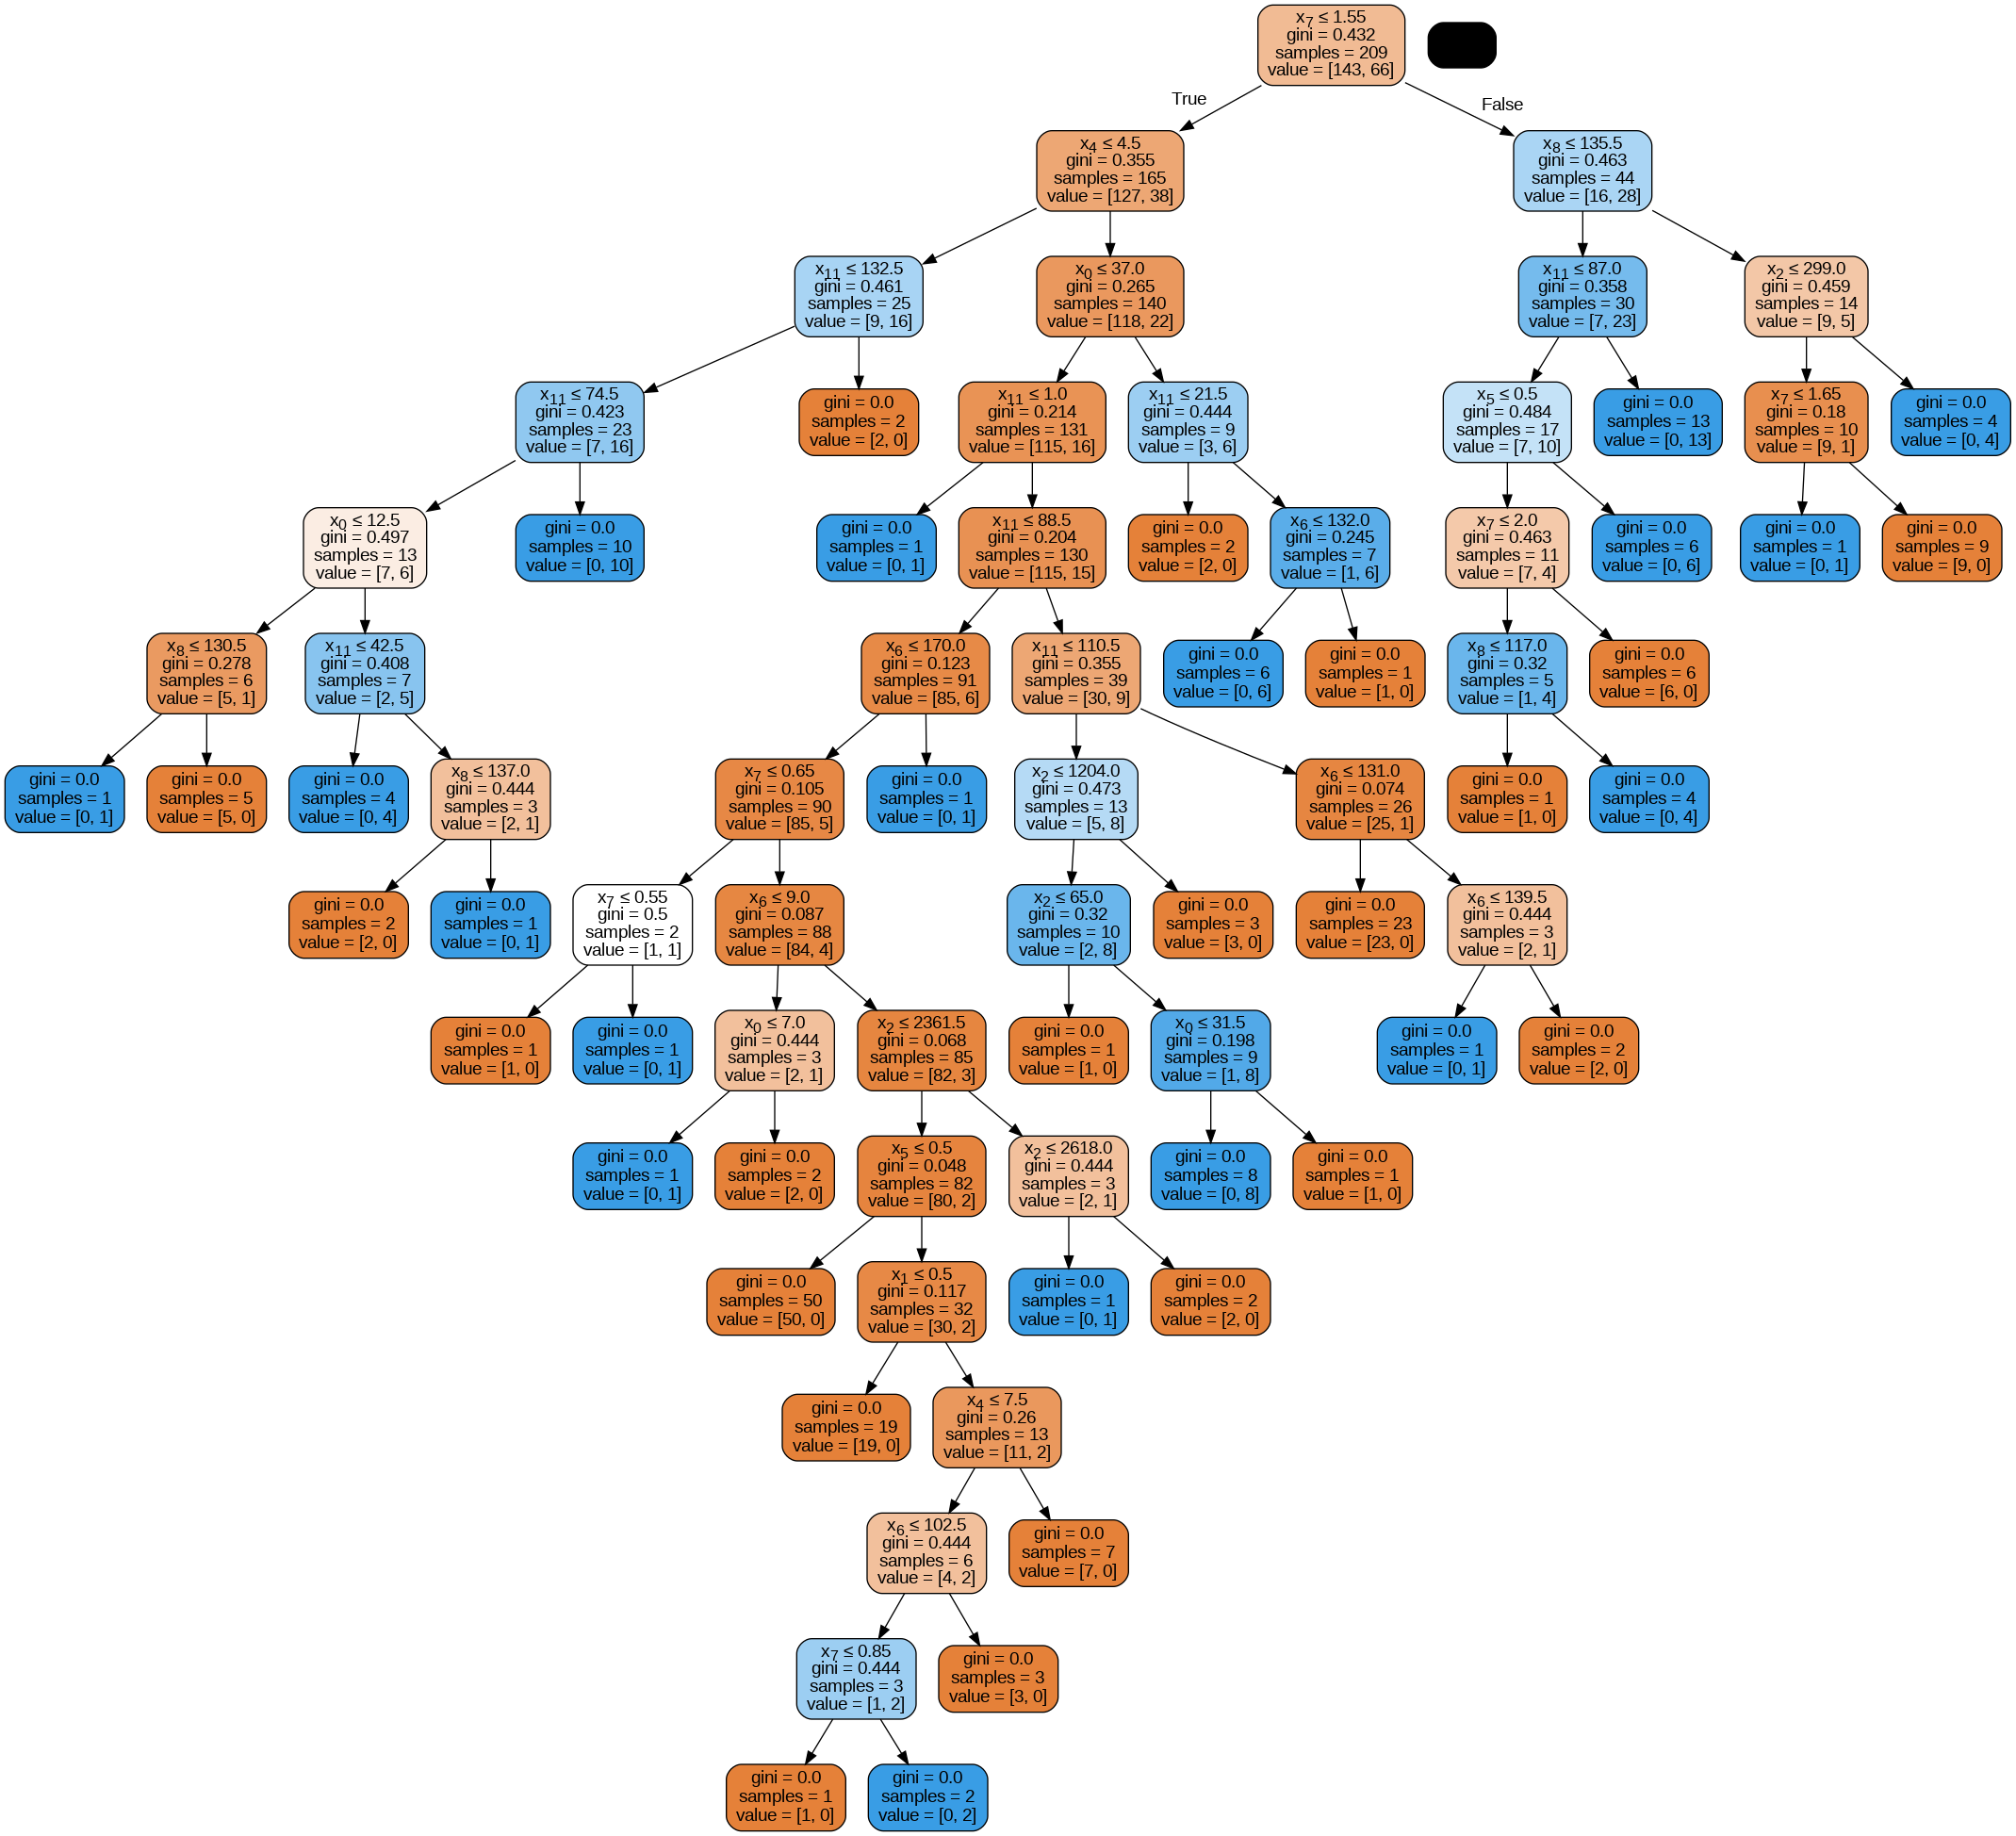

In [ ]:
dot_data = StringIO()
export_graphviz (model_dt, out_file=dot_data, filled = True, rounded = True, special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heartFailureDT-without-discretization.png')
Image(graph.create_png())

In [ ]:
#Optimization
model_dt1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model_dt1.fit(pd.get_dummies(X_train), y_train)
y_pred1 = model_dt.predict(pd.get_dummies(X_test))
(accuracy_score(y_test, y_pred1))*100

74.44444444444444

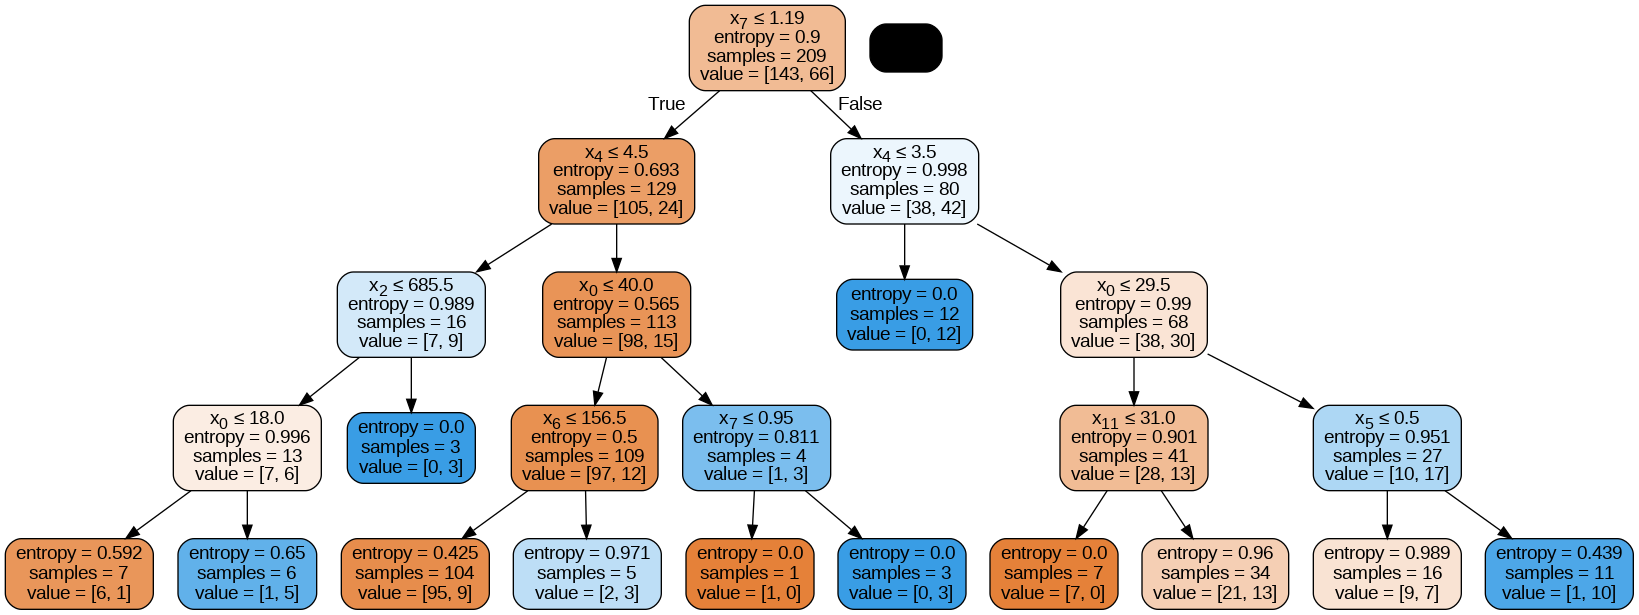

In [ ]:
dot_data = StringIO()
export_graphviz (model_dt1, out_file=dot_data, filled = True, rounded = True, special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heartFailureDT-without-discretization-optimized.png')
Image(graph.create_png())

Since not optimizing the model results with a decision tree that is very large, we will proceed with optimized decision trees

## DT with Discretized Values

In [1]:
hf_data2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_kmd,time_kmd,ej_kmd,platelets_kmd
0,34,0,582,0,3,1,86,1.9,130,1,0,104,1,2.0,2.0,0.0,1.0
1,15,0,7861,0,7,0,84,1.1,136,1,0,115,1,0.0,2.0,1.0,1.0
2,26,0,146,0,3,0,18,1.3,129,1,1,124,1,1.0,2.0,0.0,0.0
3,10,1,111,0,3,0,41,1.9,137,1,0,124,1,0.0,2.0,0.0,0.0
4,26,1,160,1,3,0,126,2.7,116,0,0,134,1,1.0,2.0,0.0,2.0


In [2]:
X_train, X_test, y_train, y_test = train_test_split(hf_data2.iloc[:, [1,2,3,5,7,8,9,10,13,14,15,16]], hf_data2.iloc[:, 12], test_size = 0.3, random_state = 50)

In [ ]:
#Optimization
model_dt2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model_dt2.fit(pd.get_dummies(X_train), y_train)
y_pred2 = model_dt2.predict(pd.get_dummies(X_test))
(accuracy_score(y_test, y_pred2))*100

72.22222222222221

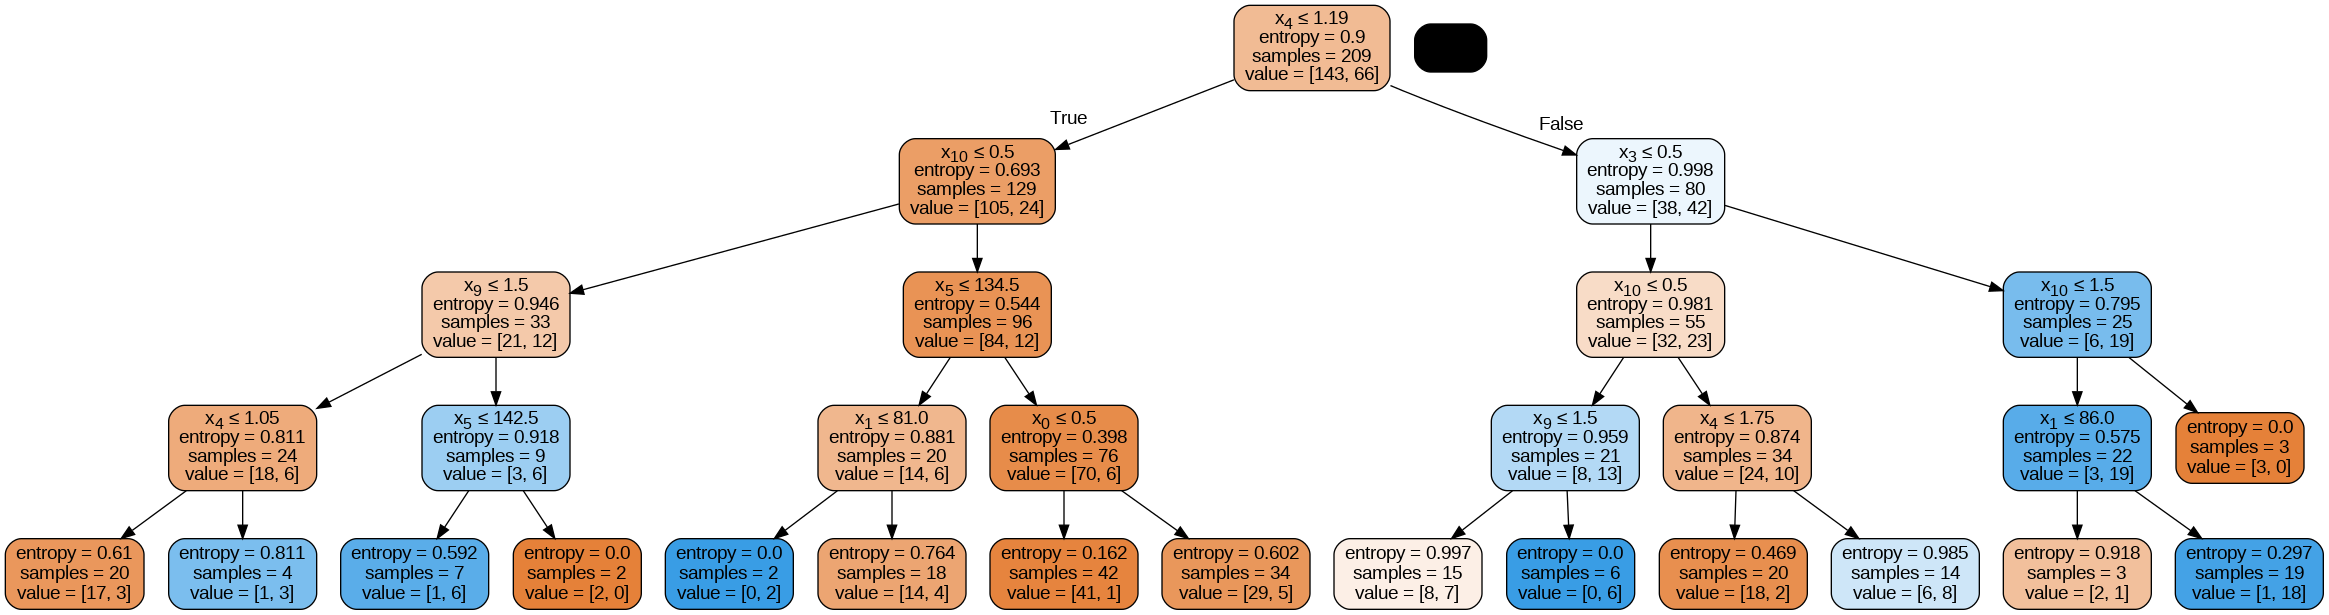

In [ ]:
dot_data = StringIO()
export_graphviz (model_dt2, out_file=dot_data, filled = True, rounded = True, special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heartFailureDT-with-discretization-optimized.png')
Image(graph.create_png())

## DT with all variables but with Discretized Platelets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hf_data2.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,16]], hf_data2.iloc[:, 12], test_size = 0.3, random_state = 50)

In [ ]:
#Optimization
model_dt3 = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model_dt3.fit(pd.get_dummies(X_train), y_train)
y_pred3 = model_dt3.predict(pd.get_dummies(X_test))
(accuracy_score(y_test, y_pred3))*100

72.22222222222221

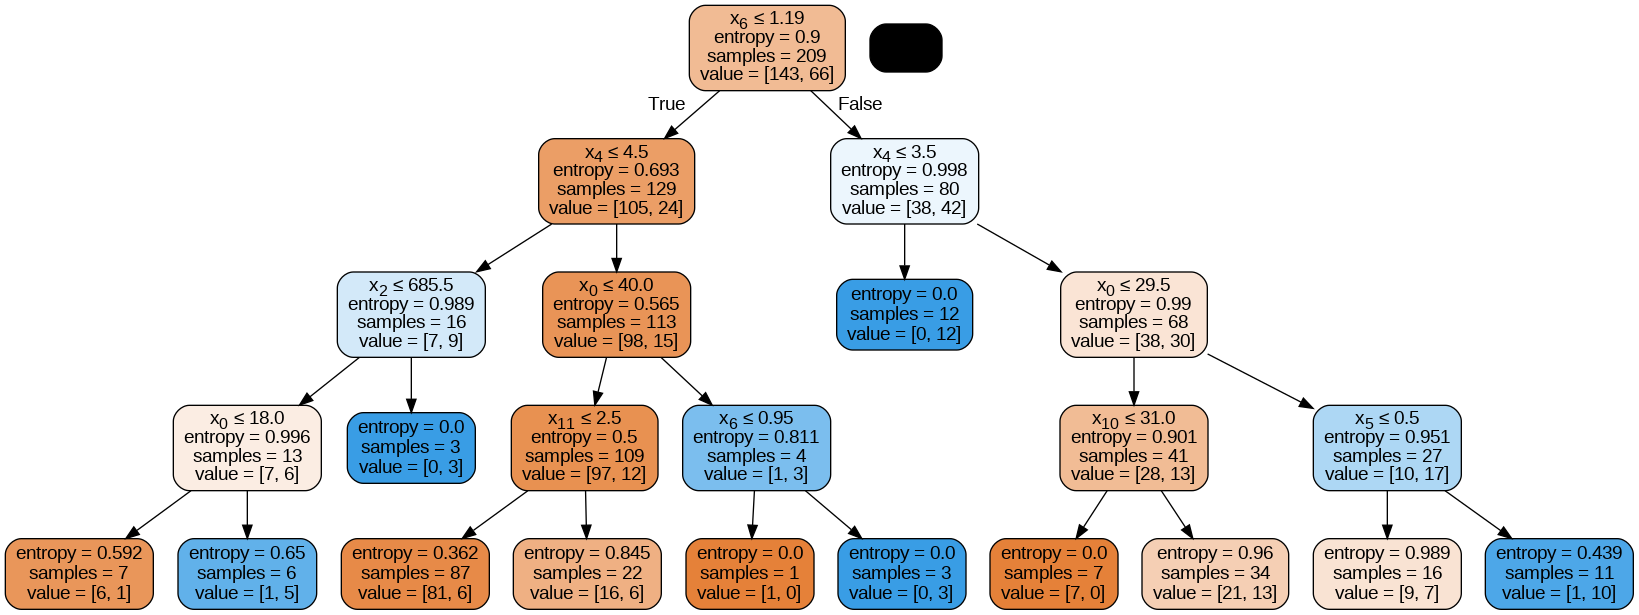

In [ ]:
dot_data = StringIO()
export_graphviz (model_dt3, out_file=dot_data, filled = True, rounded = True, special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heartFailureDT-with-discretized-platelets-optimized.png')
Image(graph.create_png())

## DT with all variables but with Discretized Time

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hf_data2.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,14]], hf_data2.iloc[:, 12], test_size = 0.3, random_state = 50)

In [ ]:
#Optimization
model_dt4 = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model_dt4.fit(pd.get_dummies(X_train), y_train)
y_pred4 = model_dt4.predict(pd.get_dummies(X_test))
(accuracy_score(y_test, y_pred4))*100

71.11111111111111

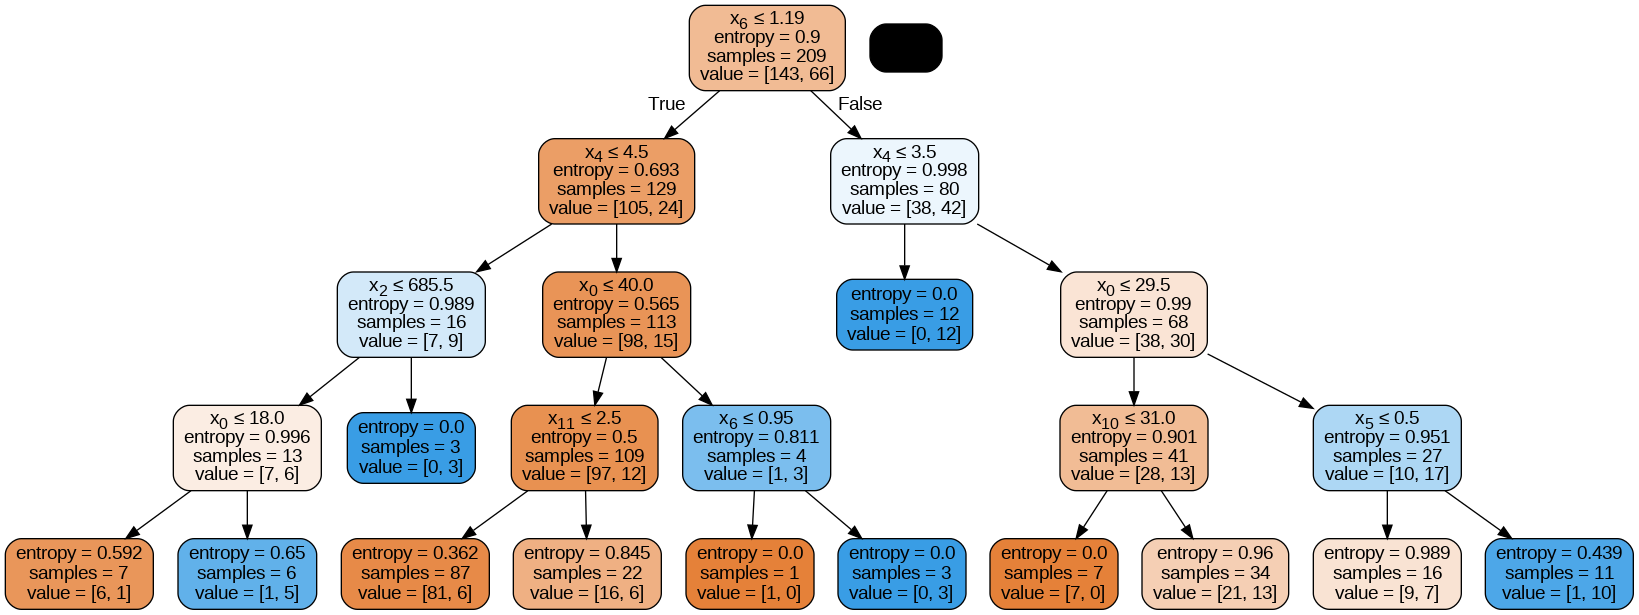

In [ ]:
dot_data = StringIO()
export_graphviz (model_dt3, out_file=dot_data, filled = True, rounded = True, special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heartFailureDT-with-discretized-time-optimized.png')
Image(graph.create_png())

# Naive Bayes Prediction

## Naive Bayes without Discretization

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hf_data2.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]], hf_data2.iloc[:, 12], test_size = 0.3, random_state = 50)

In [ ]:
model_nb1 = GaussianNB()
model_nb1.fit(X_train, y_train)
y_pred_nb1 = model_nb1.predict(X_test)

In [ ]:
cm_nb1 = confusion_matrix(y_test, y_pred_nb1)
cm_nb1

array([[57,  3],
       [23,  7]])

In [ ]:
accuracy_nb1 = (accuracy_score(y_test, y_pred_nb1)) * 100
accuracy_nb1

71.11111111111111

## Naive Bayes with Discretized Values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hf_data2.iloc[:, [1,2,3,5,7,8,9,10,13,14,15,16]], hf_data2.iloc[:, 12], test_size = 0.3, random_state = 50)

In [ ]:
model_nb2 = GaussianNB()
model_nb2.fit(X_train, y_train)
y_pred_nb2 = model_nb2.predict(X_test)

In [ ]:
cm_nb2 = confusion_matrix(y_test, y_pred_nb2)
cm_nb2

array([[57,  3],
       [24,  6]])

In [ ]:
accuracy_nb2 = (accuracy_score(y_test, y_pred_nb2)) * 100
accuracy_nb2

70.0

## Naive Bayes with all variables but with Discretized Platelets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hf_data2.iloc[:, [0,1,2,3,4,5,7,8,9,10,11,16]], hf_data2.iloc[:, 12], test_size = 0.3, random_state = 50)

In [ ]:
model_nb3 = GaussianNB()
model_nb3.fit(X_train, y_train)
y_pred_nb3 = model_nb3.predict(X_test)

In [ ]:
cm_nb3 = confusion_matrix(y_test, y_pred_nb3)
cm_nb3

array([[58,  2],
       [24,  6]])

In [ ]:
accuracy_nb3 = (accuracy_score(y_test, y_pred_nb3)) * 100
accuracy_nb3

71.11111111111111

## Naive Bayes with all variabes but with Discretized Time

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hf_data2.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,14]], hf_data2.iloc[:, 12], test_size = 0.3, random_state = 50)

In [ ]:
model_nb4 = GaussianNB()
model_nb4.fit(X_train, y_train)
y_pred_nb4 = model_nb4.predict(X_test)

In [ ]:
cm_nb4 = confusion_matrix(y_test, y_pred_nb4)
cm_nb4

array([[58,  2],
       [24,  6]])

In [ ]:
accuracy_nb4 = (accuracy_score(y_test, y_pred_nb4)) * 100
accuracy_nb4

71.11111111111111